##About Dataset

**Dataset:** 

* AirBnb - Singapore market
* Data source: Inside Airbnb website http://insideairbnb.com/get-the-data.html which hosts publicly available data from the Airbnb site.
* Scrape date: Dec 26,2021 
* Number of Recording: 3672 entries








###Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
listing = pd.read_csv('https://raw.githubusercontent.com/Huyenptt113/Airbnb-Singapore/main/listings2.csv')

In [3]:
listing.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,50646,https://www.airbnb.com/rooms/50646,20211226165704,2021-12-27,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,4.94,4.72,4.50,NaN,f,1,0,1,0,0.19
1,71609,https://www.airbnb.com/rooms/71609,20211226165704,2021-12-27,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,4.78,4.26,4.32,NaN,f,5,0,5,0,0.16
2,71896,https://www.airbnb.com/rooms/71896,20211226165704,2021-12-27,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,4.43,4.17,4.04,NaN,f,5,0,5,0,0.19


In [4]:
# check column names
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [5]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3672 non-null   int64  
 1   listing_url                                   3672 non-null   object 
 2   scrape_id                                     3672 non-null   int64  
 3   last_scraped                                  3672 non-null   object 
 4   name                                          3672 non-null   object 
 5   description                                   3555 non-null   object 
 6   neighborhood_overview                         2373 non-null   object 
 7   picture_url                                   3672 non-null   object 
 8   host_id                                       3672 non-null   int64  
 9   host_url                                      3672 non-null   o

In [6]:
listing.shape

(3672, 74)

## Audience

* The target audiences that the project toward to are: Hosts having listing in central area

## Question

Airbnb is a booking platform for listing and renting local homes. Since both hosts and travelers
can easily exchange the services in Airbnb, a good pricing strategy could create a competitive
advantage for hosts.
This project aims to answer the question: how much could an Airbnb host charge per night in Central Region in Singapore?

# A - Data Cleaning

## A1 - Remove unwanted observations

###UNNECCESSARY COLUMNS (with explanation)

### DROP COLUMNS

In [7]:
#DROP UNECESSARY COLUMS
columns = ['listing_url','scrape_id','last_scraped', 'description', 'neighborhood_overview', 'picture_url','host_url','host_name',
           'host_location', 'host_about','host_picture_url','host_thumbnail_url','host_verifications',
           'neighbourhood', 'bathrooms','availability_30','availability_60','availability_90','availability_365','property_type','host_listings_count',
           'minimum_minimum_nights', 'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'first_review','last_review','reviews_per_month',
           'calendar_updated','calendar_last_scraped', 'host_total_listings_count','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms','name','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','license','host_neighbourhood','amenities']

listing_clean = listing.drop(columns= columns)

In [8]:
# check infor after columns dropping
listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3672 non-null   int64  
 1   host_id                       3672 non-null   int64  
 2   host_since                    3661 non-null   object 
 3   host_response_time            3218 non-null   object 
 4   host_response_rate            3218 non-null   object 
 5   host_acceptance_rate          2944 non-null   object 
 6   host_is_superhost             3661 non-null   object 
 7   host_has_profile_pic          3661 non-null   object 
 8   host_identity_verified        3661 non-null   object 
 9   neighbourhood_cleansed        3672 non-null   object 
 10  neighbourhood_group_cleansed  3672 non-null   object 
 11  latitude                      3672 non-null   float64
 12  longitude                     3672 non-null   float64
 13  roo

In [9]:
#check duplication
listing_clean.duplicated().sum()

0

## A2 - Handle uncorrect Datatype

In [10]:
# Change Data-type 
listing_clean['host_response_rate'] = listing_clean['host_response_rate'].str.replace('%','').astype('float')
listing_clean['host_acceptance_rate'] = listing_clean['host_acceptance_rate'].str.replace('%','').astype('float')
listing_clean['host_since'] = pd.to_datetime(listing_clean['host_since'])

In [11]:
listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            3672 non-null   int64         
 1   host_id                       3672 non-null   int64         
 2   host_since                    3661 non-null   datetime64[ns]
 3   host_response_time            3218 non-null   object        
 4   host_response_rate            3218 non-null   float64       
 5   host_acceptance_rate          2944 non-null   float64       
 6   host_is_superhost             3661 non-null   object        
 7   host_has_profile_pic          3661 non-null   object        
 8   host_identity_verified        3661 non-null   object        
 9   neighbourhood_cleansed        3672 non-null   object        
 10  neighbourhood_group_cleansed  3672 non-null   object        
 11  latitude                      

In [12]:
# Change Data-type 
listing_clean['price'] = listing_clean['price'].str.replace(r'[$,]', '').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [13]:
#re-check data type after changing type

listing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            3672 non-null   int64         
 1   host_id                       3672 non-null   int64         
 2   host_since                    3661 non-null   datetime64[ns]
 3   host_response_time            3218 non-null   object        
 4   host_response_rate            3218 non-null   float64       
 5   host_acceptance_rate          2944 non-null   float64       
 6   host_is_superhost             3661 non-null   object        
 7   host_has_profile_pic          3661 non-null   object        
 8   host_identity_verified        3661 non-null   object        
 9   neighbourhood_cleansed        3672 non-null   object        
 10  neighbourhood_group_cleansed  3672 non-null   object        
 11  latitude                      

## A3 - Handle Corrupted Values

In [14]:
#check listings with corrupted data in 'number_of_reviews' column
listing_clean[(listing_clean['host_is_superhost']=='t') & (listing_clean['number_of_reviews']==0) & (listing_clean['review_scores_rating'] != 0)]

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable
54,1710048,8948251,2013-09-20,within a few hours,90.0,91.0,t,t,t,Outram,...,1.0,69.0,18,365,t,0,0,0,NaN,t
245,7105265,8948251,2013-09-20,within a few hours,90.0,91.0,t,t,t,Geylang,...,1.0,37.0,18,365,t,0,0,0,NaN,t
261,7466596,11463785,2014-01-20,within a few hours,95.0,4.0,t,t,t,Kallang,...,1.0,100.0,92,356,t,0,0,0,NaN,f
278,7776711,34649530,2015-05-31,within an hour,100.0,50.0,t,t,t,Queenstown,...,1.0,34.0,92,730,t,0,0,0,NaN,f
375,9397355,8948251,2013-09-20,within a few hours,90.0,91.0,t,t,t,Outram,...,1.0,69.0,18,365,t,0,0,0,NaN,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3619,53500702,360882199,2020-08-06,within an hour,100.0,96.0,t,t,t,Downtown Core,...,1.0,591.0,1,1125,t,0,0,0,NaN,f
3631,53618034,24496358,2014-12-04,within an hour,100.0,84.0,t,t,t,Novena,...,1.0,161.0,6,1125,t,0,0,0,NaN,f
3632,53622188,24496358,2014-12-04,within an hour,100.0,84.0,t,t,t,Novena,...,NaN,150.0,6,1125,t,0,0,0,NaN,f
3633,53632741,68059127,2016-04-20,within a few hours,100.0,88.0,t,t,t,Novena,...,1.0,161.0,6,1125,t,0,0,0,NaN,f


In [15]:
#change these corrupted values in 'number_of_review' column with the average number of reviews of other listings whose hosts are super hosts
not_superhost = listing_clean[listing_clean['host_is_superhost'] == 'f']
is_superhost = listing_clean[listing_clean['host_is_superhost'] == 't']
listing_clean.loc[(listing_clean['host_is_superhost'] == 't') & (listing_clean['number_of_reviews'] ==0),'number_of_reviews'] = listing_clean.loc[listing_clean['host_is_superhost'] == 't','number_of_reviews'].mean()

In [16]:
#check again
listing_clean[(listing_clean['host_is_superhost']=='t') & (listing_clean['number_of_reviews']==0) & (listing_clean['review_scores_rating'] != 0)]

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable


In [17]:
# check listings whose host is not super host
listing_clean[(listing_clean['host_is_superhost']=='f') & (listing_clean['number_of_reviews']==0) & (listing_clean['review_scores_rating'] != 0) & (listing_clean['review_scores_rating'].notna())]

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable


## A4 - Handle Missing Values

### Drop

In [18]:
#check number of missing value
listing_clean.isna().sum()

id                                 0
host_id                            0
host_since                        11
host_response_time               454
host_response_rate               454
host_acceptance_rate             728
host_is_superhost                 11
host_has_profile_pic              11
host_identity_verified            11
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
room_type                          0
accommodates                       0
bathrooms_text                    29
bedrooms                         417
beds                             130
price                              0
minimum_nights                     0
maximum_nights                     0
has_availability                   0
number_of_reviews                  0
number_of_reviews_ltm              0
number_of_reviews_l30d             0
review_scores_rating            1628
instant_bookable                   0
d

In [19]:
# Filter out the remaining rows with Null data (only 0.3% of total dataframe)
listing_clean = listing_clean[listing_clean['host_since'].notna()]

In [20]:
#check null value
listing_clean.isna().sum()

id                                 0
host_id                            0
host_since                         0
host_response_time               443
host_response_rate               443
host_acceptance_rate             717
host_is_superhost                  0
host_has_profile_pic               0
host_identity_verified             0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
room_type                          0
accommodates                       0
bathrooms_text                    29
bedrooms                         415
beds                             130
price                              0
minimum_nights                     0
maximum_nights                     0
has_availability                   0
number_of_reviews                  0
number_of_reviews_ltm              0
number_of_reviews_l30d             0
review_scores_rating            1624
instant_bookable                   0
d

### Filling missing data in selected columns

####1-Filling data: review_scores_rating


In [21]:
#check listings containing missing values in 'review_scores_rating' column that has no review
listing_clean[(listing_clean['review_scores_rating'].isna()) & (listing_clean['number_of_reviews'] ==0)].shape

(1442, 27)

**1442 missing values in the 'review_scores_rating' column belongs to listings that have no review. So, these missing value will be filled with 0**

In [22]:
#fill data
listing_clean.loc[listing_clean['number_of_reviews'] ==0,'review_scores_rating'] = listing_clean.loc[listing_clean['number_of_reviews'] ==0,'review_scores_rating'].fillna(0)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [23]:
#check again
listing_clean.isna().sum()

id                                0
host_id                           0
host_since                        0
host_response_time              443
host_response_rate              443
host_acceptance_rate            717
host_is_superhost                 0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
room_type                         0
accommodates                      0
bathrooms_text                   29
bedrooms                        415
beds                            130
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
review_scores_rating            182
instant_bookable                  0
dtype: int64

In [24]:
#check listings containing missing values in 'review_scores_rating' column that has review
listing_clean[(listing_clean['review_scores_rating'].isna()) & (listing_clean['number_of_reviews'] !=0)].shape

(182, 27)

In [25]:
#check whether listings containing missing values in 'review_scores_rating' column belongs to host is superhost
listing_clean[(listing_clean['review_scores_rating'].isna()) & (listing_clean['host_is_superhost'] == 't')].shape

(182, 27)

**182 missing values in review_scores_rating belong to listings that have at least one review and hosts are superhost. Therefore, those missing values will be filled with the mean of review scores of other 'host-is-superhost' listings.**

In [26]:
# filling data with superhost

listing_clean.loc[listing_clean['host_is_superhost'] == 't','review_scores_rating'] = listing_clean.loc[listing_clean['host_is_superhost'] == 't','review_scores_rating'].fillna(is_superhost['review_scores_rating'].mean())

In [27]:
# re-check
listing_clean.isna().sum()

id                                0
host_id                           0
host_since                        0
host_response_time              443
host_response_rate              443
host_acceptance_rate            717
host_is_superhost                 0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
room_type                         0
accommodates                      0
bathrooms_text                   29
bedrooms                        415
beds                            130
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
review_scores_rating              0
instant_bookable                  0
dtype: int64

####2- Filling data: host_response_time






In [28]:
#check host response time of each type of host
listing_clean.groupby('host_response_time')['host_is_superhost'].value_counts()

host_response_time  host_is_superhost
a few days or more  f                    618
within a day        f                    375
                    t                     74
within a few hours  f                    992
                    t                    429
within an hour      f                    441
                    t                    289
Name: host_is_superhost, dtype: int64

**Regardless of the 'Super host' status, the majority of the hosts response their customers within a few hours. Therefore, the missing values of the 'host_response_time' column will be filled with 'within a few hours'**

In [29]:
#fill data
listing_clean['host_response_time'] = listing_clean[['host_response_time']].fillna('within a few hours')

####3-Filling Data: host_response_rate

In [30]:
#check the average of host response rate of each type of host
listing_clean.groupby('host_is_superhost')['host_response_rate'].mean()

host_is_superhost
f    71.785655
t    97.079545
Name: host_response_rate, dtype: float64

**The missing value in the 'host_response_rate' will be filled with the mean of response time in each type of host**

In [31]:
#filldata

listing_clean.loc[listing_clean['host_is_superhost'] == 't','host_response_rate'] = listing_clean.loc[listing_clean['host_is_superhost'] == 't','host_response_rate'].fillna(is_superhost['host_response_rate'].mean())
listing_clean.loc[listing_clean['host_is_superhost'] == 'f','host_response_rate'] = listing_clean.loc[listing_clean['host_is_superhost'] == 'f','host_response_rate'].fillna(not_superhost['host_response_rate'].mean())


####4-Filling data: host_acceptance_rate 

In [32]:
#check number of missing value again
listing_clean.isna().sum()

id                                0
host_id                           0
host_since                        0
host_response_time                0
host_response_rate                0
host_acceptance_rate            717
host_is_superhost                 0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
room_type                         0
accommodates                      0
bathrooms_text                   29
bedrooms                        415
beds                            130
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
review_scores_rating              0
instant_bookable                  0
dtype: int64

In [33]:
listing_clean.groupby('host_is_superhost')['host_acceptance_rate'].mean()

host_is_superhost
f    55.486599
t    82.562821
Name: host_acceptance_rate, dtype: float64

**The average acceptance rates between superhost host and non-superhost host are different**

In [34]:
#create new table
not_superhost_booked = listing_clean[(listing_clean['host_is_superhost'] == 'f') & (listing_clean['number_of_reviews']!=0)]
not_superhost_not_booked = listing_clean[(listing_clean['host_is_superhost'] == 'f') & (listing_clean['number_of_reviews']==0)]

In [35]:
not_superhost_booked['host_acceptance_rate'].mean()

63.28842676311031

In [36]:
not_superhost_not_booked['host_acceptance_rate'].mean()

47.33081285444234

**The average acceptance rates are also different among hosts whose listings have been booked and not have been booked before**

In [37]:
#check number of missing value in the 'host_acceptance_rate' columns that belongs to listings whose host are superhosts
listing_clean[(listing_clean['host_acceptance_rate'].isna()) & (listing_clean['host_is_superhost'] =='t')].shape

(25, 27)

In [38]:
# check number of missing value in the 'host_acceptance_rate' columns that belongs to listings whose host are not superhosts

listing_clean[(listing_clean['host_acceptance_rate'].isna()) & (listing_clean['host_is_superhost'] =='f')].shape

(692, 27)

In [39]:
#check number of missing value in the 'host_acceptance_rate' columns that belongs to listings whose host are not superhosts and listings have at least one review
listing_clean[(listing_clean['host_acceptance_rate'].isna()) & (listing_clean['host_is_superhost'] =='f') & (listing_clean['number_of_reviews']!=0)].shape

(308, 27)

**The missing value in the 'host_acceptance_rate' will be filled with the mean of response time in each type of host. For listings whose hosts are not superhost, the missing value will be filled depending on whether that listing has at least one review. Assuming listings having at least one review used to be booked before**

In [40]:
#fill data
listing_clean.loc[listing_clean['host_is_superhost'] == 't','host_acceptance_rate'] = listing_clean.loc[listing_clean['host_is_superhost'] == 't','host_acceptance_rate'].fillna(is_superhost['host_acceptance_rate'].mean())

listing_clean.loc[(listing_clean['host_is_superhost'] == 'f') & (listing_clean['number_of_reviews']!=0),'host_acceptance_rate'] = listing_clean.loc[(listing_clean['host_is_superhost'] == 'f') & (listing_clean['number_of_reviews']!=0),'host_acceptance_rate'].fillna(not_superhost_booked['host_acceptance_rate'].mean())

listing_clean.loc[(listing_clean['host_is_superhost'] == 'f') & (listing_clean['number_of_reviews']==0),'host_acceptance_rate'] = listing_clean.loc[(listing_clean['host_is_superhost'] == 'f') & (listing_clean['number_of_reviews']==0),'host_acceptance_rate'].fillna(not_superhost_not_booked['host_acceptance_rate'].mean())

In [41]:
# Check again:
listing_clean.isna().sum()

id                                0
host_id                           0
host_since                        0
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
room_type                         0
accommodates                      0
bathrooms_text                   29
bedrooms                        415
beds                            130
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
number_of_reviews                 0
number_of_reviews_ltm             0
number_of_reviews_l30d            0
review_scores_rating              0
instant_bookable                  0
dtype: int64

####5-Filling data: Property

#####Filling data: bedrooms

In [42]:
listing_clean['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [43]:
listing_clean['bedrooms'].unique()

array([ 1.,  2., nan,  3.,  4.,  5.,  8.,  6.])

In [44]:
listing.groupby('room_type')['bedrooms'].mean()

room_type
Entire home/apt    1.671745
Hotel room         1.119718
Private room       1.066360
Shared room        1.000000
Name: bedrooms, dtype: float64

**The missing value in the 'bedrooms' will be filled with the mean of response time in each room type**

In [45]:
def check_room_type(x):
  if x['room_type'] == 'Entire home/apt':
      return  2.0
  else:
      return  1.0
# fill the missing value with the apply function:
listing_clean['bedrooms']= listing_clean['bedrooms'].fillna(listing_clean.apply(check_room_type,axis=1))    
# change values in bedrooms column to interger
listing_clean['bedrooms']= listing_clean['bedrooms'].astype('int')

#####Filling data: beds

In [46]:
listing_clean['beds'].unique()

array([ 1.,  3.,  2.,  4., 12.,  6., 16.,  8., nan,  5.,  9.,  7., 28.,
       10., 13., 20., 14., 36., 46., 32.])

In [47]:
listing.groupby('room_type')['beds'].mean()

room_type
Entire home/apt    1.900867
Hotel room         4.012500
Private room       1.358154
Shared room        4.629371
Name: beds, dtype: float64

**Similarly, the missing value in the 'bedrooms' will be filled with the mean of response time in each room type**

In [48]:
def check_room_type2(x):
  if x['room_type'] == 'Shared room':
    return 5.0
  elif x['room_type'] == 'Hotel room':
    return 4.0
  elif x['room_type'] == 'Private room':
    return 1.0
  else:
    return 2.0
# fill the missing value with the apply function:
listing_clean['beds']= listing_clean['beds'].fillna(listing_clean.apply(check_room_type2,axis=1))    
# change values in bedrooms column to interger
listing_clean['beds']= listing_clean['beds'].astype('int')

#####Filling data: bathrooms_text

In [49]:
listing_clean['bathrooms_text'].unique()

array(['1 bath', '1 private bath', 'Shared half-bath', nan,
       '1 shared bath', '0 baths', '2 shared baths', '4 shared baths',
       '1.5 shared baths', '2 baths', 'Private half-bath', '3 baths',
       '2.5 baths', '4 baths', '3 shared baths', '1.5 baths', '8 baths',
       '0 shared baths', 'Half-bath', '3.5 baths', '2.5 shared baths',
       '5 baths', '6 baths', '5 shared baths', '7.5 shared baths',
       '7 shared baths', '8 shared baths', '6 shared baths',
       '4.5 shared baths', '4.5 baths', '8.5 shared baths', '8.5 baths',
       '9 shared baths', '10 baths', '10 shared baths', '21 shared baths',
       '3.5 shared baths', '16 shared baths', '16 baths', '13 baths',
       '13 shared baths', '5.5 shared baths'], dtype=object)

In [50]:
# step 1: takes the "number " out the the strings of the column
listing_clean['bathrooms_text'] = listing_clean['bathrooms_text'].str.replace(r'[a-zA-Z\s]', '')
# replace the '' values to 1:
listing_clean['bathrooms_text'] = listing_clean['bathrooms_text'].str.replace(r'\D$','1')
# turn the type to float
listing_clean['bathrooms_text'] = listing_clean['bathrooms_text'].astype('float')
# change the name to barthrooms
listing_clean.rename(columns = {'bathrooms_text':'bathrooms'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [51]:
listing_clean['bathrooms'].unique()

array([ 1. ,  nan,  0. ,  2. ,  4. ,  1.5,  3. ,  2.5,  8. ,  3.5,  5. ,
        6. ,  7.5,  7. ,  4.5,  8.5,  9. , 10. , 21. , 16. , 13. ,  5.5])

In [52]:
listing_clean[listing_clean['bathrooms'].notna()].groupby('room_type')['bathrooms'].mean()

room_type
Entire home/apt    1.408981
Hotel room         3.243506
Private room       1.426113
Shared room        2.809701
Name: bathrooms, dtype: float64

In [53]:
def check_room_type3(x):
  if x['room_type'] == 'Shared room':
    return 3.0
  elif x['room_type'] == 'Hotel room':
    return 3.0
  else:
    return 1.5
# fill the missing value with the apply function:
listing_clean['bathrooms']= listing_clean['bathrooms'].fillna(listing_clean.apply(check_room_type3,axis=1))    
# change values in bedrooms column to interger
listing_clean['bathrooms']= listing_clean['bathrooms'].astype('int')

#B - Exploratory Data Analysis

In [54]:
listing_clean.describe()

,id,host_id,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating
count,3.661000e+03,3.661000e+03,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000,3661.000000
mean,3.144591e+07,1.223108e+08,77.347409,61.241174,1.312409,103.846364,2.901666,1.516526,1.356187,1.847856,209.514887,41.117454,913.275608,12.867694,0.993444,0.100246,2.710788
std,1.478468e+07,1.098881e+08,31.571716,31.898409,0.031686,0.043367,2.250719,1.285932,0.663970,2.149867,406.840937,68.633177,1703.578384,31.832389,4.784876,0.464067,2.296451
min,5.064600e+04,2.366600e+04,0.000000,0.000000,1.245350,103.648280,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.983120e+07,2.848959e+07,71.785655,41.000000,1.292700,103.835810,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,365.000000,0.000000,0.000000,0.000000,0.000000
50%,3.362160e+07,9.787886e+07,95.000000,63.288427,1.309360,103.848090,2.000000,1.000000,1.000000,1.000000,135.000000,7.000000,1125.000000,1.000000,0.000000,0.000000,4.170000
75%,4.325412e+07,1.748440e+08,100.000000,91.000000,1.319160,103.862060,4.000000,2.000000,2.000000,2.000000,220.000000,90.000000,1125.000000,11.000000,0.000000,0.000000,4.800000
max,5.392782e+07,4.358150e+08,100.000000,100.000000,1.453280,103.969660,16.000000,21.000000,8.000000,46.000000,10286.000000,1000.000000,100000.000000,369.000000,118.000000,8.000000,5.000000


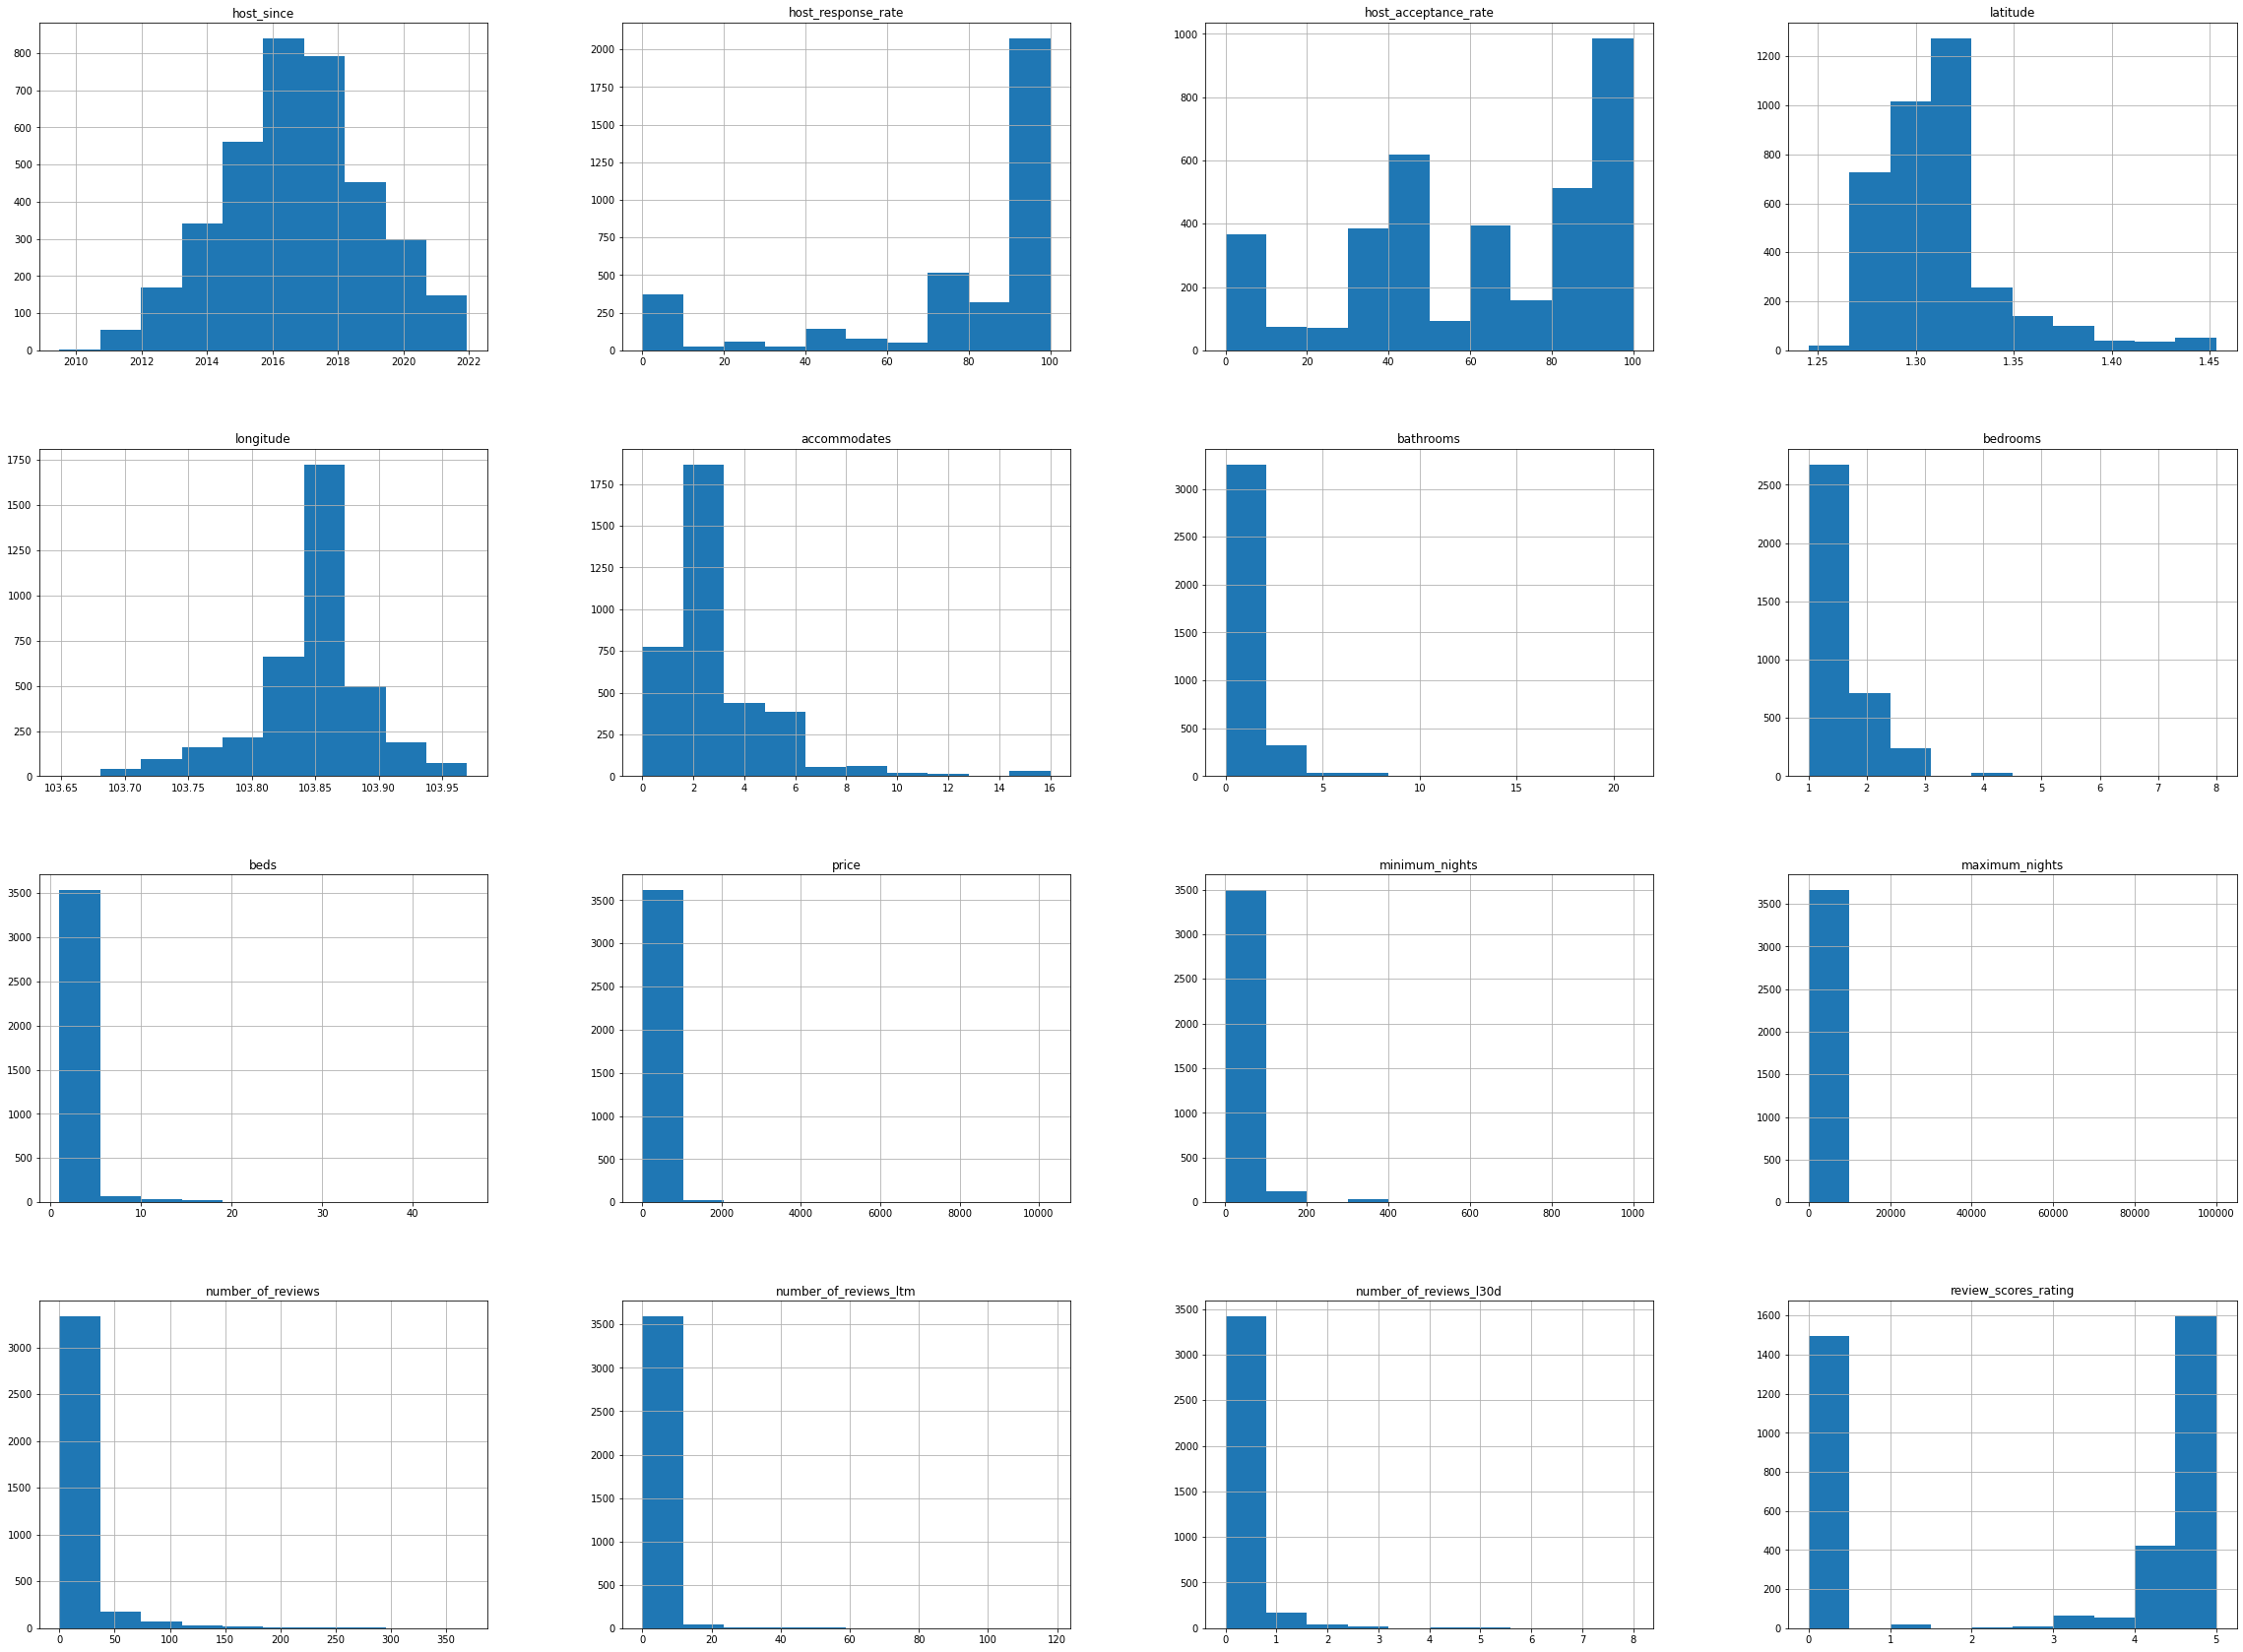

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
listing_clean.iloc[:,2:].hist(figsize=(40,30), bins = 10)
plt.show()

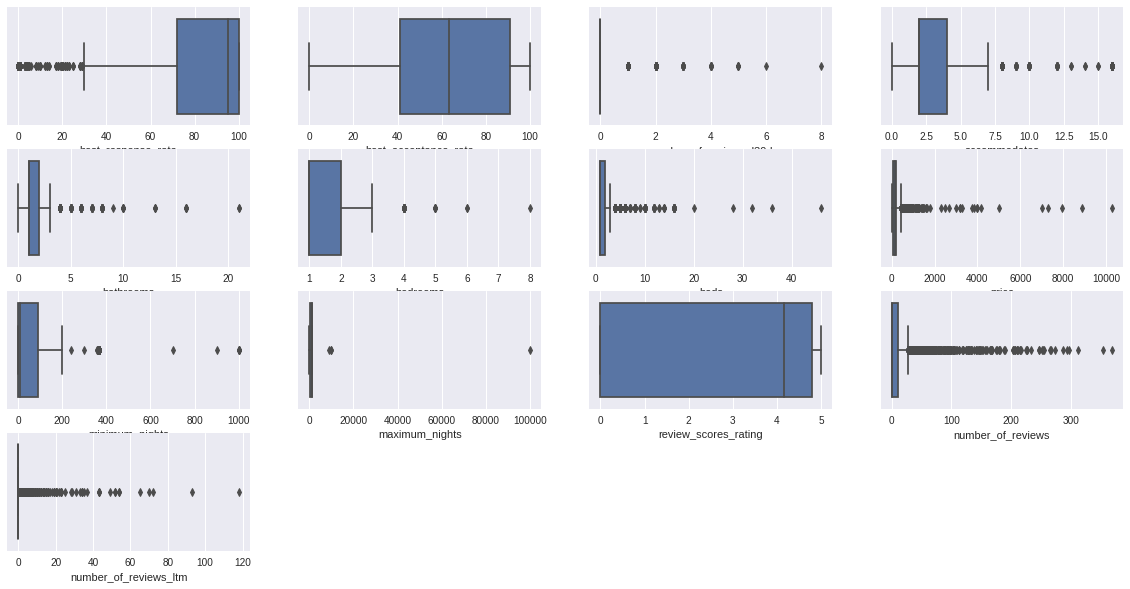

In [56]:
# Outliers - listing.gz / review columns

plt.style.use('seaborn')


plt.figure(figsize=(20, 10))

plt.subplot(441)
rating = listing_clean['host_response_rate'].reset_index()
sns.boxplot(data=rating, x = 'host_response_rate')

plt.subplot(442)
accuracy = listing_clean['host_acceptance_rate'].reset_index()
sns.boxplot(data=accuracy, x = 'host_acceptance_rate')

plt.subplot(443)
value = listing_clean['number_of_reviews_l30d'].reset_index()
sns.boxplot(data=value, x = 'number_of_reviews_l30d')

plt.subplot(444)
checkin = listing_clean['accommodates'].reset_index()
sns.boxplot(data=checkin, x = 'accommodates')

plt.subplot(445)
communication = listing_clean['bathrooms'].reset_index()
sns.boxplot(data=communication, x = 'bathrooms')

plt.subplot(446)
location = listing_clean['bedrooms'].reset_index()
sns.boxplot(data=location, x = 'bedrooms')

plt.subplot(447)
value = listing_clean['beds'].reset_index()
sns.boxplot(data=value, x = 'beds')

plt.subplot(448)
value = listing_clean['price'].reset_index()
sns.boxplot(data=value, x = 'price')

plt.subplot(449)
value = listing_clean['minimum_nights'].reset_index()
sns.boxplot(data=value, x = 'minimum_nights')

plt.subplot(4,4,10)
value = listing_clean['maximum_nights'].reset_index()
sns.boxplot(data=value, x = 'maximum_nights')

plt.subplot(4,4,11)
value = listing_clean['review_scores_rating'].reset_index()
sns.boxplot(data=value, x = 'review_scores_rating')

plt.subplot(4,4,12)
value = listing_clean['number_of_reviews'].reset_index()
sns.boxplot(data=value, x = 'number_of_reviews')

plt.subplot(4,4,13)
value = listing_clean['number_of_reviews_ltm'].reset_index()
sns.boxplot(data=value, x = 'number_of_reviews_ltm')


plt.show()

## Listings by location

In [57]:
listing_clean.head(1)

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable
0,50646,227796,2010-09-08,within a few hours,71.785655,63.288427,f,t,t,Bukit Timah,...,1,80.0,90,730,t,18.0,0,0,4.56,f


In [58]:
#check neighbourhood name
listing_clean['neighbourhood_group_cleansed'].unique()

array(['Central Region', 'East Region', 'North-East Region',
       'West Region', 'North Region'], dtype=object)

In [59]:
#check number of listings in each region
listing_clean.groupby('neighbourhood_group_cleansed').size()

neighbourhood_group_cleansed
Central Region       2898
East Region           249
North Region          105
North-East Region     140
West Region           269
dtype: int64

**More than 75% number of listings are in Central Region**

In [60]:
#check number of superhost listings in each region
listing_clean.groupby(['neighbourhood_group_cleansed','host_is_superhost']).size()

neighbourhood_group_cleansed  host_is_superhost
Central Region                f                    2249
                              t                     649
East Region                   f                     176
                              t                      73
North Region                  f                      90
                              t                      15
North-East Region             f                     123
                              t                      17
West Region                   f                     218
                              t                      51
dtype: int64

##Central Region

In [61]:
listing_central = listing_clean[listing_clean['neighbourhood_group_cleansed'] == 'Central Region']
listing_central.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable
0,50646,227796,2010-09-08,within a few hours,71.785655,63.288427,f,t,t,Bukit Timah,...,1,80.0,90,730,t,18.0,0,0,4.56,f
4,275343,1439258,2011-11-24,within a few hours,87.000000,77.000000,f,t,t,Bukit Merah,...,1,52.0,14,999,t,20.0,0,0,4.39,f
5,275344,1439258,2011-11-24,within a few hours,87.000000,77.000000,f,t,t,Bukit Merah,...,1,40.0,14,999,t,13.0,1,0,4.55,f
6,294281,1521514,2011-12-20,within a few hours,95.000000,0.000000,f,t,t,Newton,...,1,72.0,90,1125,t,133.0,0,0,4.43,f
7,324945,1439258,2011-11-24,within a few hours,87.000000,77.000000,f,t,t,Bukit Merah,...,1,49.0,14,999,t,14.0,0,0,4.20,f


In [62]:
#check number of listings in each area in Central Region
listing_central.groupby('neighbourhood_cleansed').size().sort_values(ascending=False)

neighbourhood_cleansed
Kallang             405
Geylang             340
Downtown Core       317
Outram              309
Rochor              270
Novena              235
Bukit Merah         170
River Valley        147
Queenstown          143
Singapore River     108
Tanglin              89
Orchard              80
Marine Parade        57
Newton               57
Bukit Timah          56
Toa Payoh            40
Bishan               39
Southern Islands     18
Museum               15
Marina South          3
dtype: int64

**In Central Region, Six areas having the most number of listings are Kallang, Geylang, Downtown Core, Outram, Rochor, and Novena.**

In [63]:
listing_central.groupby(['neighbourhood_cleansed','host_is_superhost']).size().sort_values(ascending=False)

neighbourhood_cleansed  host_is_superhost
Kallang                 f                    296
Geylang                 f                    262
Outram                  f                    238
Downtown Core           f                    225
Rochor                  f                    205
Novena                  f                    189
Bukit Merah             f                    144
River Valley            f                    139
Queenstown              f                    129
Kallang                 t                    109
Downtown Core           t                     92
Singapore River         f                     85
Geylang                 t                     78
Outram                  t                     71
Tanglin                 f                     67
Rochor                  t                     65
Orchard                 f                     65
Novena                  t                     46
Newton                  f                     43
Bukit Timah             f  

In [64]:
listing_central.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)

neighbourhood_cleansed
Southern Islands    1877.888889
Orchard              643.050000
Marina South         546.000000
Singapore River      337.462963
Newton               313.666667
Tanglin              304.426966
River Valley         260.605442
Queenstown           223.650350
Toa Payoh            223.300000
Novena               220.646809
Downtown Core        214.788644
Bukit Merah          209.823529
Rochor               197.644444
Museum               191.600000
Outram               185.042071
Bishan               156.358974
Marine Parade        151.736842
Kallang              132.367901
Geylang              130.247059
Bukit Timah          114.821429
Name: price, dtype: float64

In [65]:
listing_central.groupby('neighbourhood_cleansed')['number_of_reviews'].mean().sort_values(ascending=False)

neighbourhood_cleansed
Geylang             22.553570
Marine Parade       22.164956
Toa Payoh           18.835217
Newton              16.877302
Rochor              16.302282
Outram              15.797459
Southern Islands    13.733402
Kallang             13.350679
Museum              11.880083
River Valley        11.711590
Bukit Timah         11.532232
Tanglin             11.235955
Downtown Core       11.043012
Bukit Merah         10.991787
Singapore River      8.611226
Novena               8.189909
Bishan               6.200127
Marina South         4.333333
Queenstown           3.584641
Orchard              3.502516
Name: number_of_reviews, dtype: float64

In [66]:
# Calculate number of reviews per month based on first review date and last review date
from datetime import date
listing_central['today'] = pd.to_datetime(date.today())
listing_central['num_host_days'] = (listing_central['today'] - listing_central['host_since']).dt.days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [67]:
from datetime import date
listing_central['today'] = pd.to_datetime(date.today())
listing_central['num_host_days'] = (listing_central['today'] - listing_central['host_since']).dt.days
listing_central = listing_central.drop(columns = 'today')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
listing_central.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,num_host_days
0,50646,227796,2010-09-08,within a few hours,71.785655,63.288427,f,t,t,Bukit Timah,...,80.0,90,730,t,18.0,0,0,4.56,f,4200
4,275343,1439258,2011-11-24,within a few hours,87.000000,77.000000,f,t,t,Bukit Merah,...,52.0,14,999,t,20.0,0,0,4.39,f,3758
5,275344,1439258,2011-11-24,within a few hours,87.000000,77.000000,f,t,t,Bukit Merah,...,40.0,14,999,t,13.0,1,0,4.55,f,3758
6,294281,1521514,2011-12-20,within a few hours,95.000000,0.000000,f,t,t,Newton,...,72.0,90,1125,t,133.0,0,0,4.43,f,3732
7,324945,1439258,2011-11-24,within a few hours,87.000000,77.000000,f,t,t,Bukit Merah,...,49.0,14,999,t,14.0,0,0,4.20,f,3758


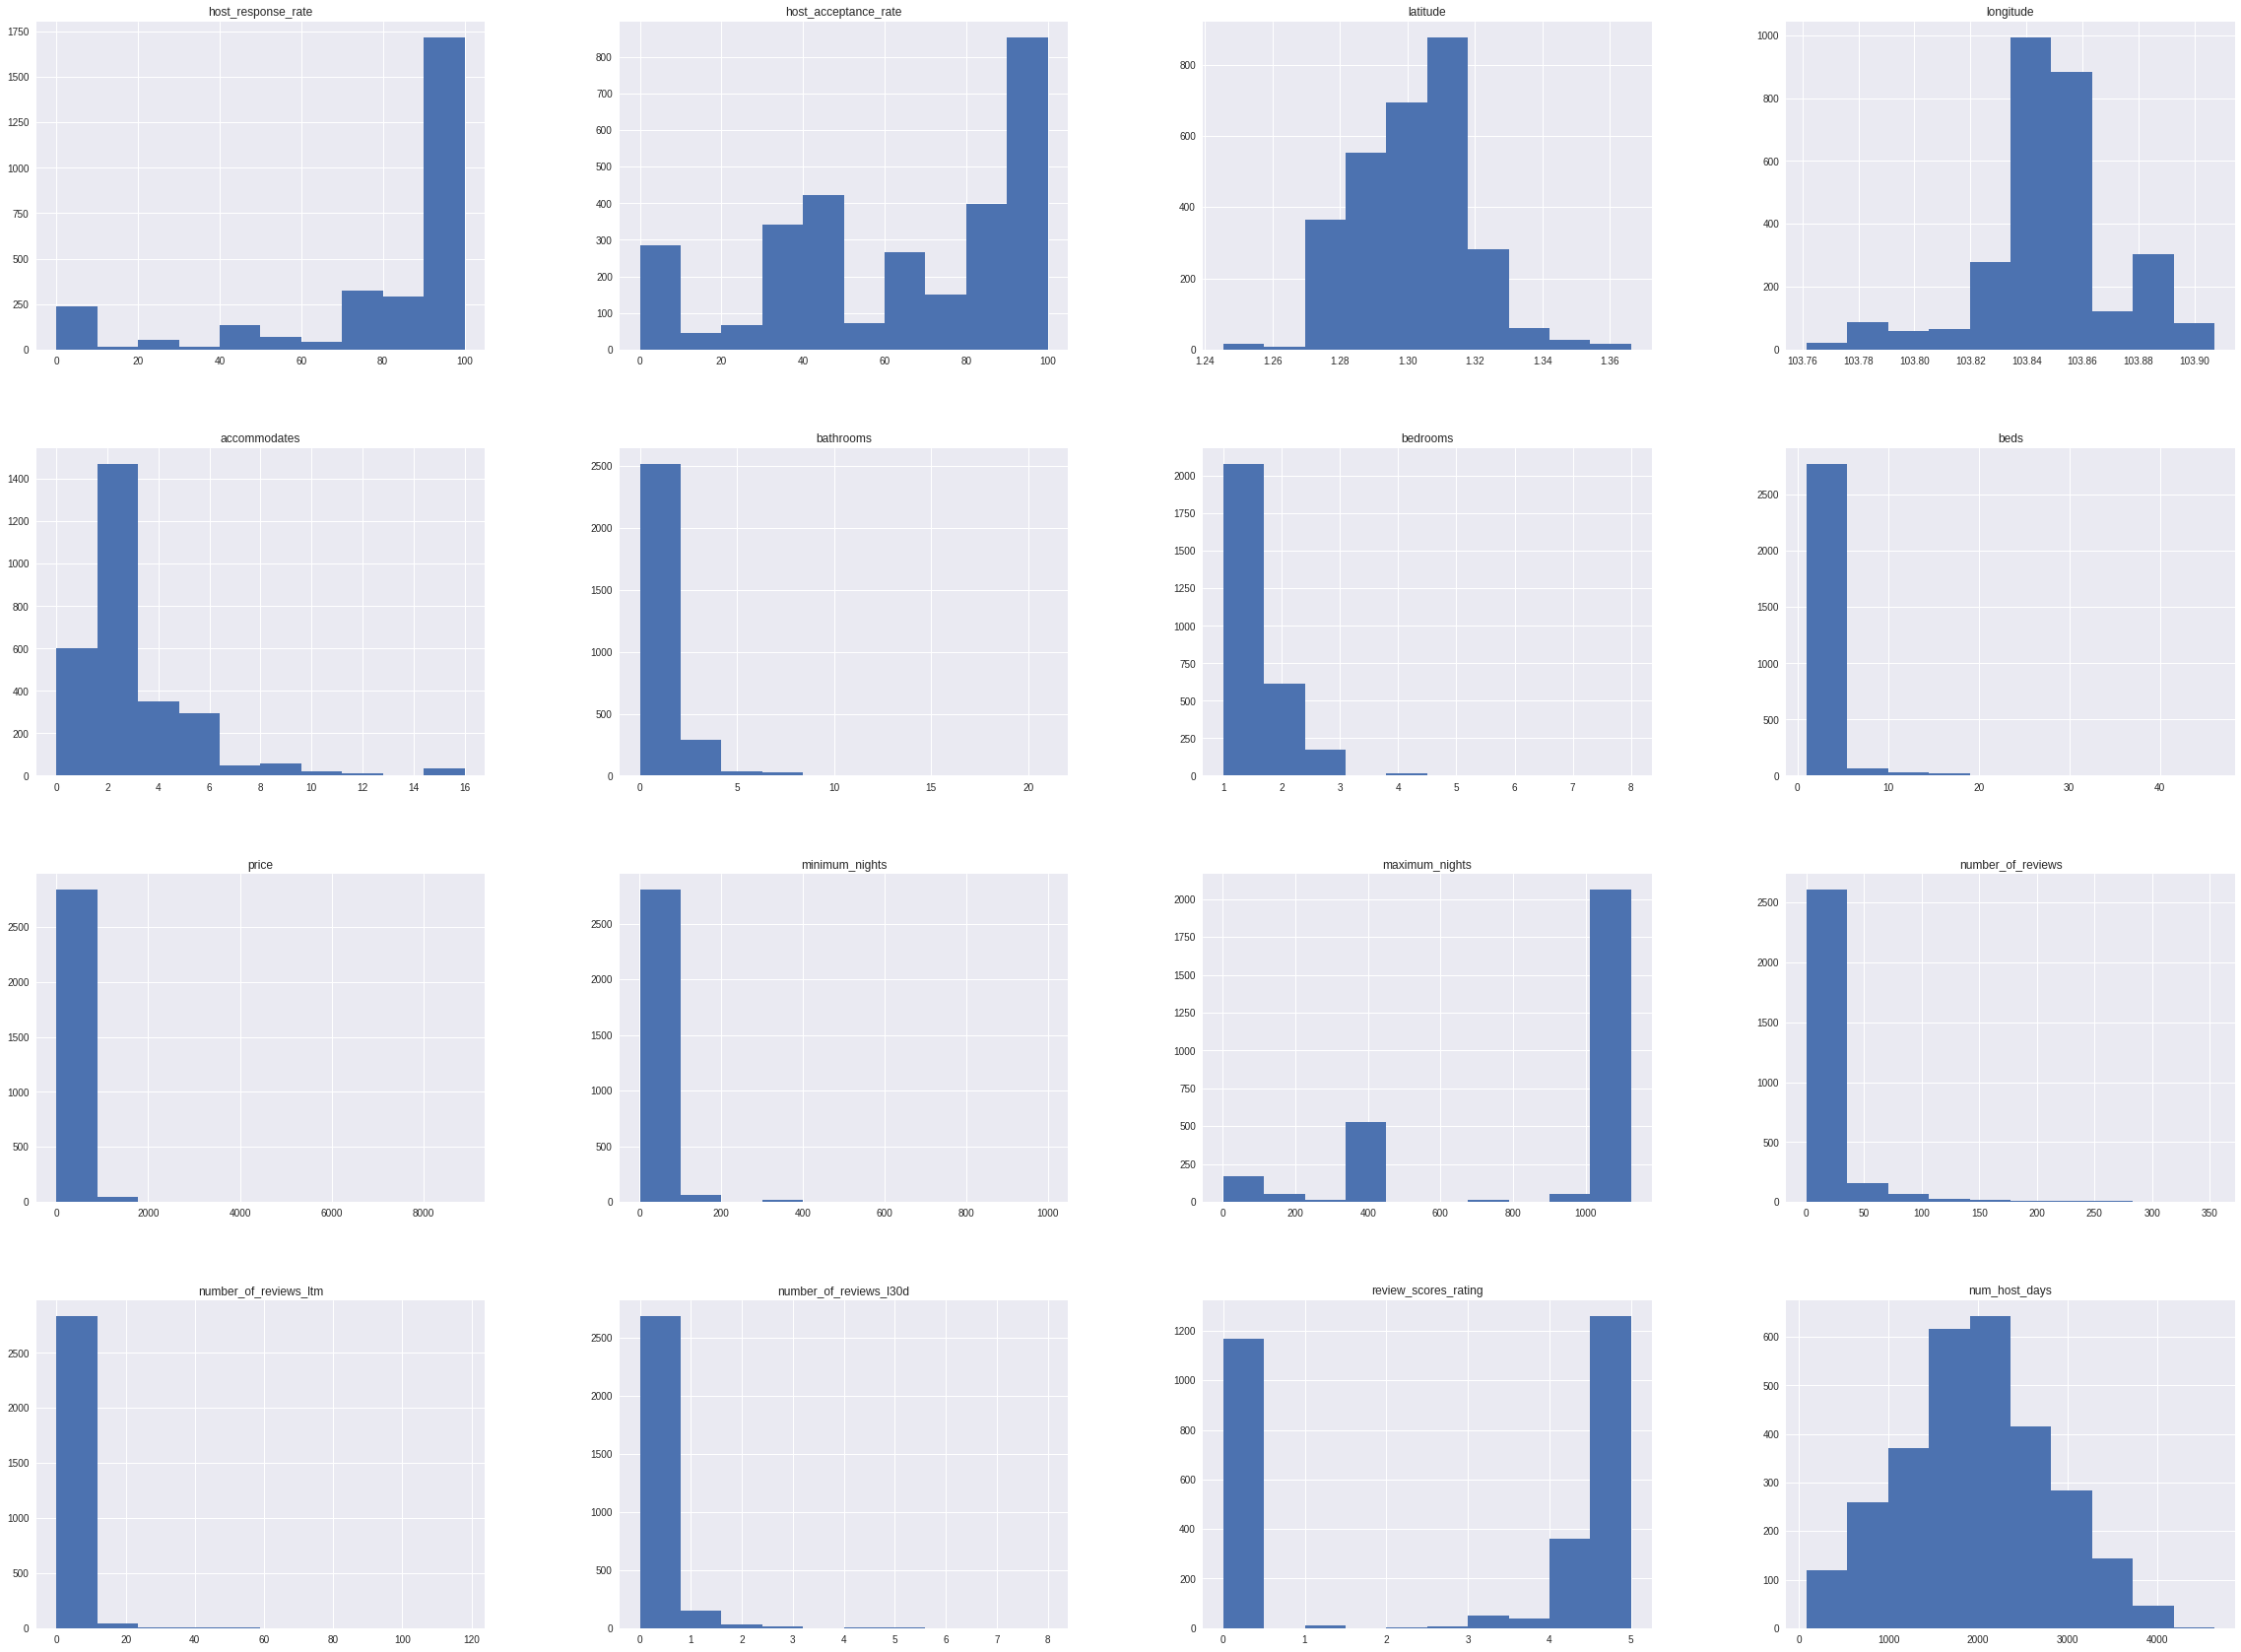

In [69]:
listing_central.iloc[:,3:].hist(figsize=(40,30), bins = 10)
plt.show()

# ML

In [70]:
listing_central.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2898 entries, 0 to 3670
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            2898 non-null   int64         
 1   host_id                       2898 non-null   int64         
 2   host_since                    2898 non-null   datetime64[ns]
 3   host_response_time            2898 non-null   object        
 4   host_response_rate            2898 non-null   float64       
 5   host_acceptance_rate          2898 non-null   float64       
 6   host_is_superhost             2898 non-null   object        
 7   host_has_profile_pic          2898 non-null   object        
 8   host_identity_verified        2898 non-null   object        
 9   neighbourhood_cleansed        2898 non-null   object        
 10  neighbourhood_group_cleansed  2898 non-null   object        
 11  latitude                      

In [71]:
central = listing_central.drop(columns = ['id','host_id','host_since','neighbourhood_cleansed','neighbourhood_group_cleansed'])

In [72]:
central.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2898 entries, 0 to 3670
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      2898 non-null   object 
 1   host_response_rate      2898 non-null   float64
 2   host_acceptance_rate    2898 non-null   float64
 3   host_is_superhost       2898 non-null   object 
 4   host_has_profile_pic    2898 non-null   object 
 5   host_identity_verified  2898 non-null   object 
 6   latitude                2898 non-null   float64
 7   longitude               2898 non-null   float64
 8   room_type               2898 non-null   object 
 9   accommodates            2898 non-null   int64  
 10  bathrooms               2898 non-null   int64  
 11  bedrooms                2898 non-null   int64  
 12  beds                    2898 non-null   int64  
 13  price                   2898 non-null   float64
 14  minimum_nights          2898 non-null   

In [73]:
corr_table=central.corr()
corr_table

,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,num_host_days
host_response_rate,1.000000,0.363875,-0.072138,0.049937,-0.038787,-0.028260,0.012242,-0.074631,-0.042774,0.028324,0.018865,0.118775,0.111715,0.133581,0.153873,0.126341
host_acceptance_rate,0.363875,1.000000,-0.072235,0.094545,-0.170986,-0.037302,-0.157957,-0.122462,-0.078559,-0.041734,-0.106284,0.162759,0.194719,0.183400,0.388494,0.051277
latitude,-0.072138,-0.072235,1.000000,0.276339,0.057628,0.059052,0.083469,0.052584,-0.127167,0.058107,0.015194,0.033575,-0.034828,0.024998,-0.007401,0.024643
longitude,0.049937,0.094545,0.276339,1.000000,0.019242,0.070425,-0.065278,0.050253,-0.128090,0.019912,-0.060357,0.131330,0.025720,0.070981,0.142031,0.018527
accommodates,-0.038787,-0.170986,0.057628,0.019242,1.000000,0.307684,0.437612,0.761625,0.169451,-0.092445,0.132371,0.026766,-0.024309,-0.018615,-0.012943,-0.089495
bathrooms,-0.028260,-0.037302,0.059052,0.070425,0.307684,1.000000,0.123694,0.348267,0.024341,-0.105322,0.051369,-0.008130,-0.062740,-0.057122,0.076712,0.045818
bedrooms,0.012242,-0.157957,0.083469,-0.065278,0.437612,0.123694,1.000000,0.209088,0.245839,0.034759,0.174328,-0.064855,-0.019408,-0.012866,-0.149551,-0.113932
beds,-0.074631,-0.122462,0.052584,0.050253,0.761625,0.348267,0.209088,1.000000,0.076058,-0.089025,0.034463,0.025861,-0.041174,-0.032565,0.009698,-0.027354
price,-0.042774,-0.078559,-0.127167,-0.128090,0.169451,0.024341,0.245839,0.076058,1.000000,-0.092630,0.036332,-0.083177,-0.017992,-0.016290,-0.159004,-0.122840
minimum_nights,0.028324,-0.041734,0.058107,0.019912,-0.092445,-0.105322,0.034759,-0.089025,-0.092630,1.000000,0.031467,-0.025791,-0.077164,-0.082173,-0.059630,0.117883


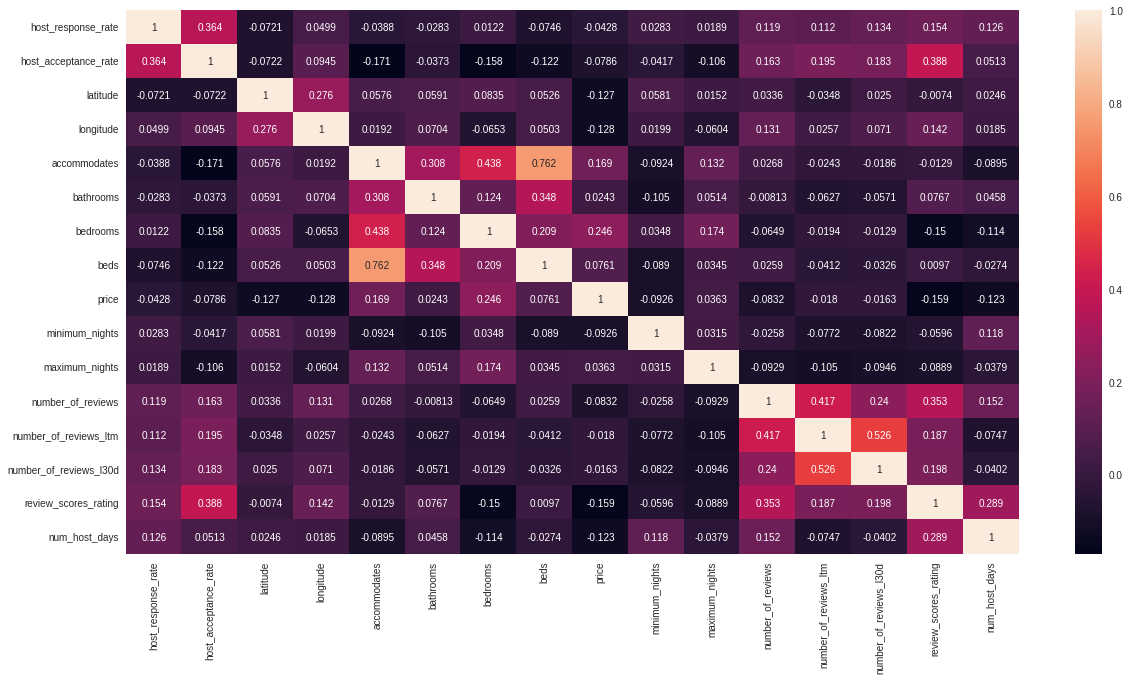

In [74]:
plt.figure(figsize=(20,10))
sns.heatmap(central.corr(), annot=True, fmt=".3g")
plt.show()

In [79]:
import seaborn as sns
plt.figure(figsize=(30,20))
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(central)


import matplotlib.pyplot as plt
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [75]:
corr_table['price'].sort_values(ascending=False)

price                     1.000000
bedrooms                  0.245839
accommodates              0.169451
beds                      0.076058
maximum_nights            0.036332
bathrooms                 0.024341
number_of_reviews_l30d   -0.016290
number_of_reviews_ltm    -0.017992
host_response_rate       -0.042774
host_acceptance_rate     -0.078559
number_of_reviews        -0.083177
minimum_nights           -0.092630
num_host_days            -0.122840
latitude                 -0.127167
longitude                -0.128090
review_scores_rating     -0.159004
Name: price, dtype: float64

In [76]:
from google.colab import files
df.to_csv('filename.csv') 
files.download('filename.csv')

NameError: ignored